# 평균이동법, 지수평활법

## #01. 작업준비

### 1) 패키지 가져오기

평균이동법, 지수평활법을 위한 별도의 패키지는 필요하지 않다.

In [12]:
import warnings
warnings.filterwarnings(action='ignore')

from hossam.util import *
from hossam.plot import *
from hossam.timeserise import *


### 2) 데이터 가져오기

월간 항공 승객 수

In [13]:
origin = my_read_excel("https://data.hossam.kr/tsdata/air_passengers.xlsx", index_col="Month", info=False)

## #02. 데이터 전처리 - 차분

정상성을 확보할 때 까지 차분을 수행한다.

=========== 원본 데이터 ===========


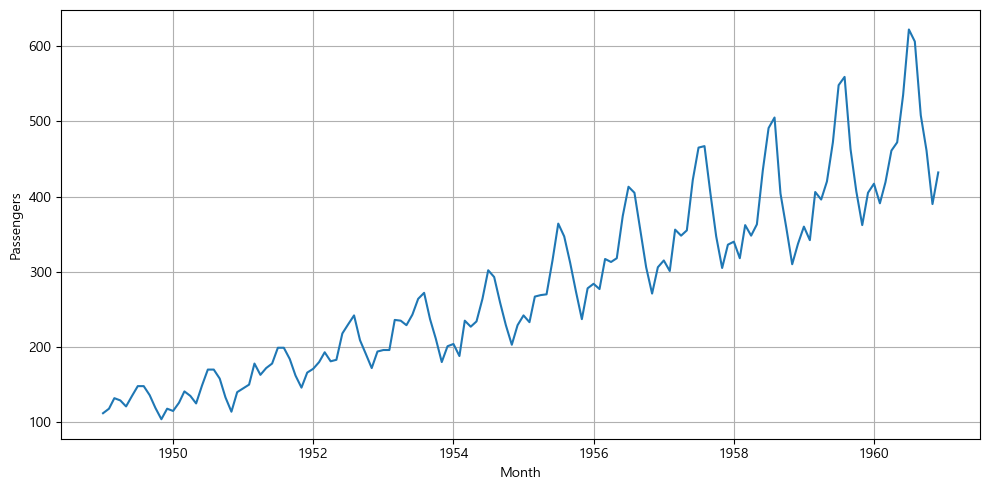

+----------------------------------+---------------------+
|                                  | ADF Test            |
|----------------------------------+---------------------|
| 검정통계량(ADF Statistic)        | 0.8153688792060482  |
| 유의수준(p-value)                | 0.991880243437641   |
| 최적차수(num of lags)            | 13                  |
| 관측치 개수(num of observations) | 130                 |
| 기각값(Critical Values) 1%       | -3.4816817173418295 |
| 기각값(Critical Values) 5%       | -2.8840418343195267 |
| 기각값(Critical Values) 10%      | -2.578770059171598  |
| 데이터 정상성 여부               | 비정상              |
+----------------------------------+---------------------+
=========== 1차 차분 데이터 ===========


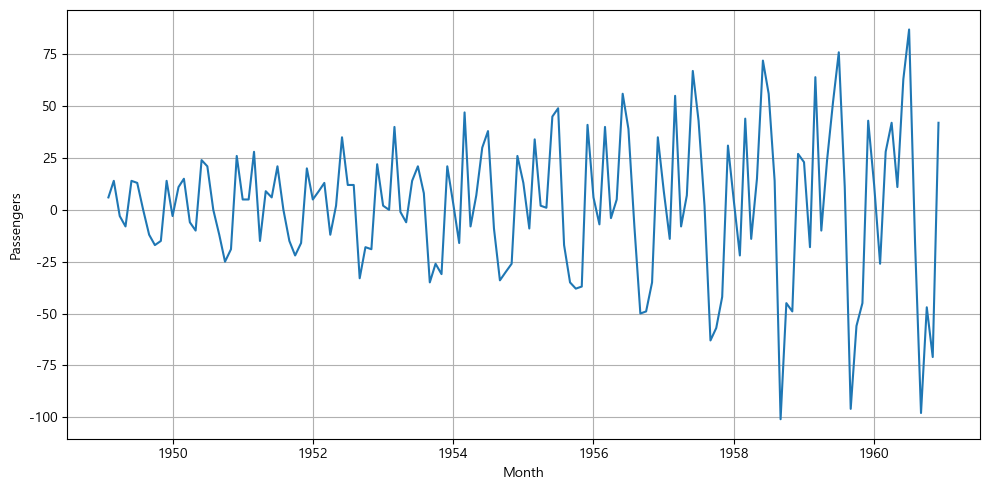

+----------------------------------+---------------------+
|                                  | ADF Test            |
|----------------------------------+---------------------|
| 검정통계량(ADF Statistic)        | -2.8292668241699994 |
| 유의수준(p-value)                | 0.0542132902838255  |
| 최적차수(num of lags)            | 12                  |
| 관측치 개수(num of observations) | 130                 |
| 기각값(Critical Values) 1%       | -3.4816817173418295 |
| 기각값(Critical Values) 5%       | -2.8840418343195267 |
| 기각값(Critical Values) 10%      | -2.578770059171598  |
| 데이터 정상성 여부               | 비정상              |
+----------------------------------+---------------------+
=========== 2차 차분 데이터 ===========


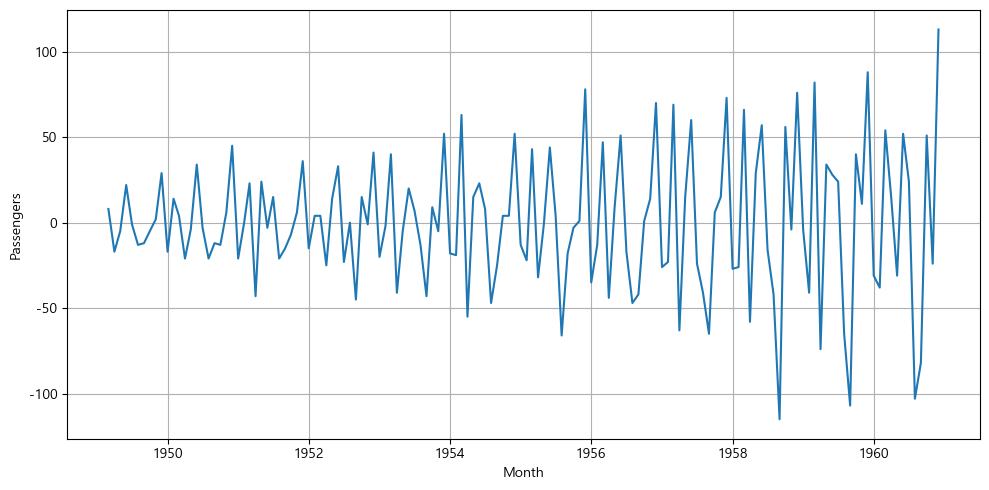

+----------------------------------+------------------------+
|                                  | ADF Test               |
|----------------------------------+------------------------|
| 검정통계량(ADF Statistic)        | -16.384231542468505    |
| 유의수준(p-value)                | 2.7328918500142407e-29 |
| 최적차수(num of lags)            | 11                     |
| 관측치 개수(num of observations) | 130                    |
| 기각값(Critical Values) 1%       | -3.4816817173418295    |
| 기각값(Critical Values) 5%       | -2.8840418343195267    |
| 기각값(Critical Values) 10%      | -2.578770059171598     |
| 데이터 정상성 여부               | 정상                   |
+----------------------------------+------------------------+
+---------------------+--------------+
| Month               |   Passengers |
|---------------------+--------------|
| 1949-03-01 00:00:00 |            8 |
| 1949-04-01 00:00:00 |          -17 |
| 1949-05-01 00:00:00 |           -5 |
| 1949-06-01 00:00:00 |           22 |
| 1949-07-01 00:00:0

In [14]:
df = my_diff(origin, 'Passengers')
my_pretty_table(df.head())

## #03. 평균이동법

가장 고전적인 시계열 데이터 분석 방법

주어진 구간의 평균을 구해서 이어서 표시하는 것으로 미래의 데이터를 예측한다.

구간은 분석가가 임의로 정할 수 있다.

평균 이동 결과가 실제 데이터와 얼마나 차이가 나는지의 여부로 데이터를 판단

과거로부터 현재까지의 시계열 자료를 대상으로 일정기간별 평균이동을 계산하면 이들의 추세를 통해 다음 기간을 예측할 수 있다.

> 2~3개 단위로 묶어서 평균을 구해 그 추이를 시각화 해서 판별하는 주관적 방법

데이터의 증감 경향을 확인하기 위해 차분되지 않은 원본 데이터로 하는 경우도 있다.

### [1] 차분되지 않은 원본에 대한 3개월, 6개월, 9개월 평균

#### 평균이동 수행

In [15]:
df2 = origin.copy()

df2['month3'] = df2['Passengers'].rolling(3).mean()
df2['month6'] = df2['Passengers'].rolling(6).mean()
df2['month9'] = df2['Passengers'].rolling(9).mean()
my_pretty_table(df2.head(15))

+---------------------+--------------+----------+----------+----------+
| Month               |   Passengers |   month3 |   month6 |   month9 |
|---------------------+--------------+----------+----------+----------|
| 1949-01-01 00:00:00 |          112 |      nan |      nan |      nan |
| 1949-02-01 00:00:00 |          118 |      nan |      nan |      nan |
| 1949-03-01 00:00:00 |          132 |  120.667 |      nan |      nan |
| 1949-04-01 00:00:00 |          129 |  126.333 |      nan |      nan |
| 1949-05-01 00:00:00 |          121 |  127.333 |      nan |      nan |
| 1949-06-01 00:00:00 |          135 |  128.333 |    124.5 |      nan |
| 1949-07-01 00:00:00 |          148 |  134.667 |    130.5 |      nan |
| 1949-08-01 00:00:00 |          148 |  143.667 |    135.5 |      nan |
| 1949-09-01 00:00:00 |          136 |      144 |  136.167 |      131 |
| 1949-10-01 00:00:00 |          119 |  134.333 |    134.5 |  131.778 |
| 1949-11-01 00:00:00 |          104 |  119.667 |  131.667 |  13

#### 시계열 그래프 확인

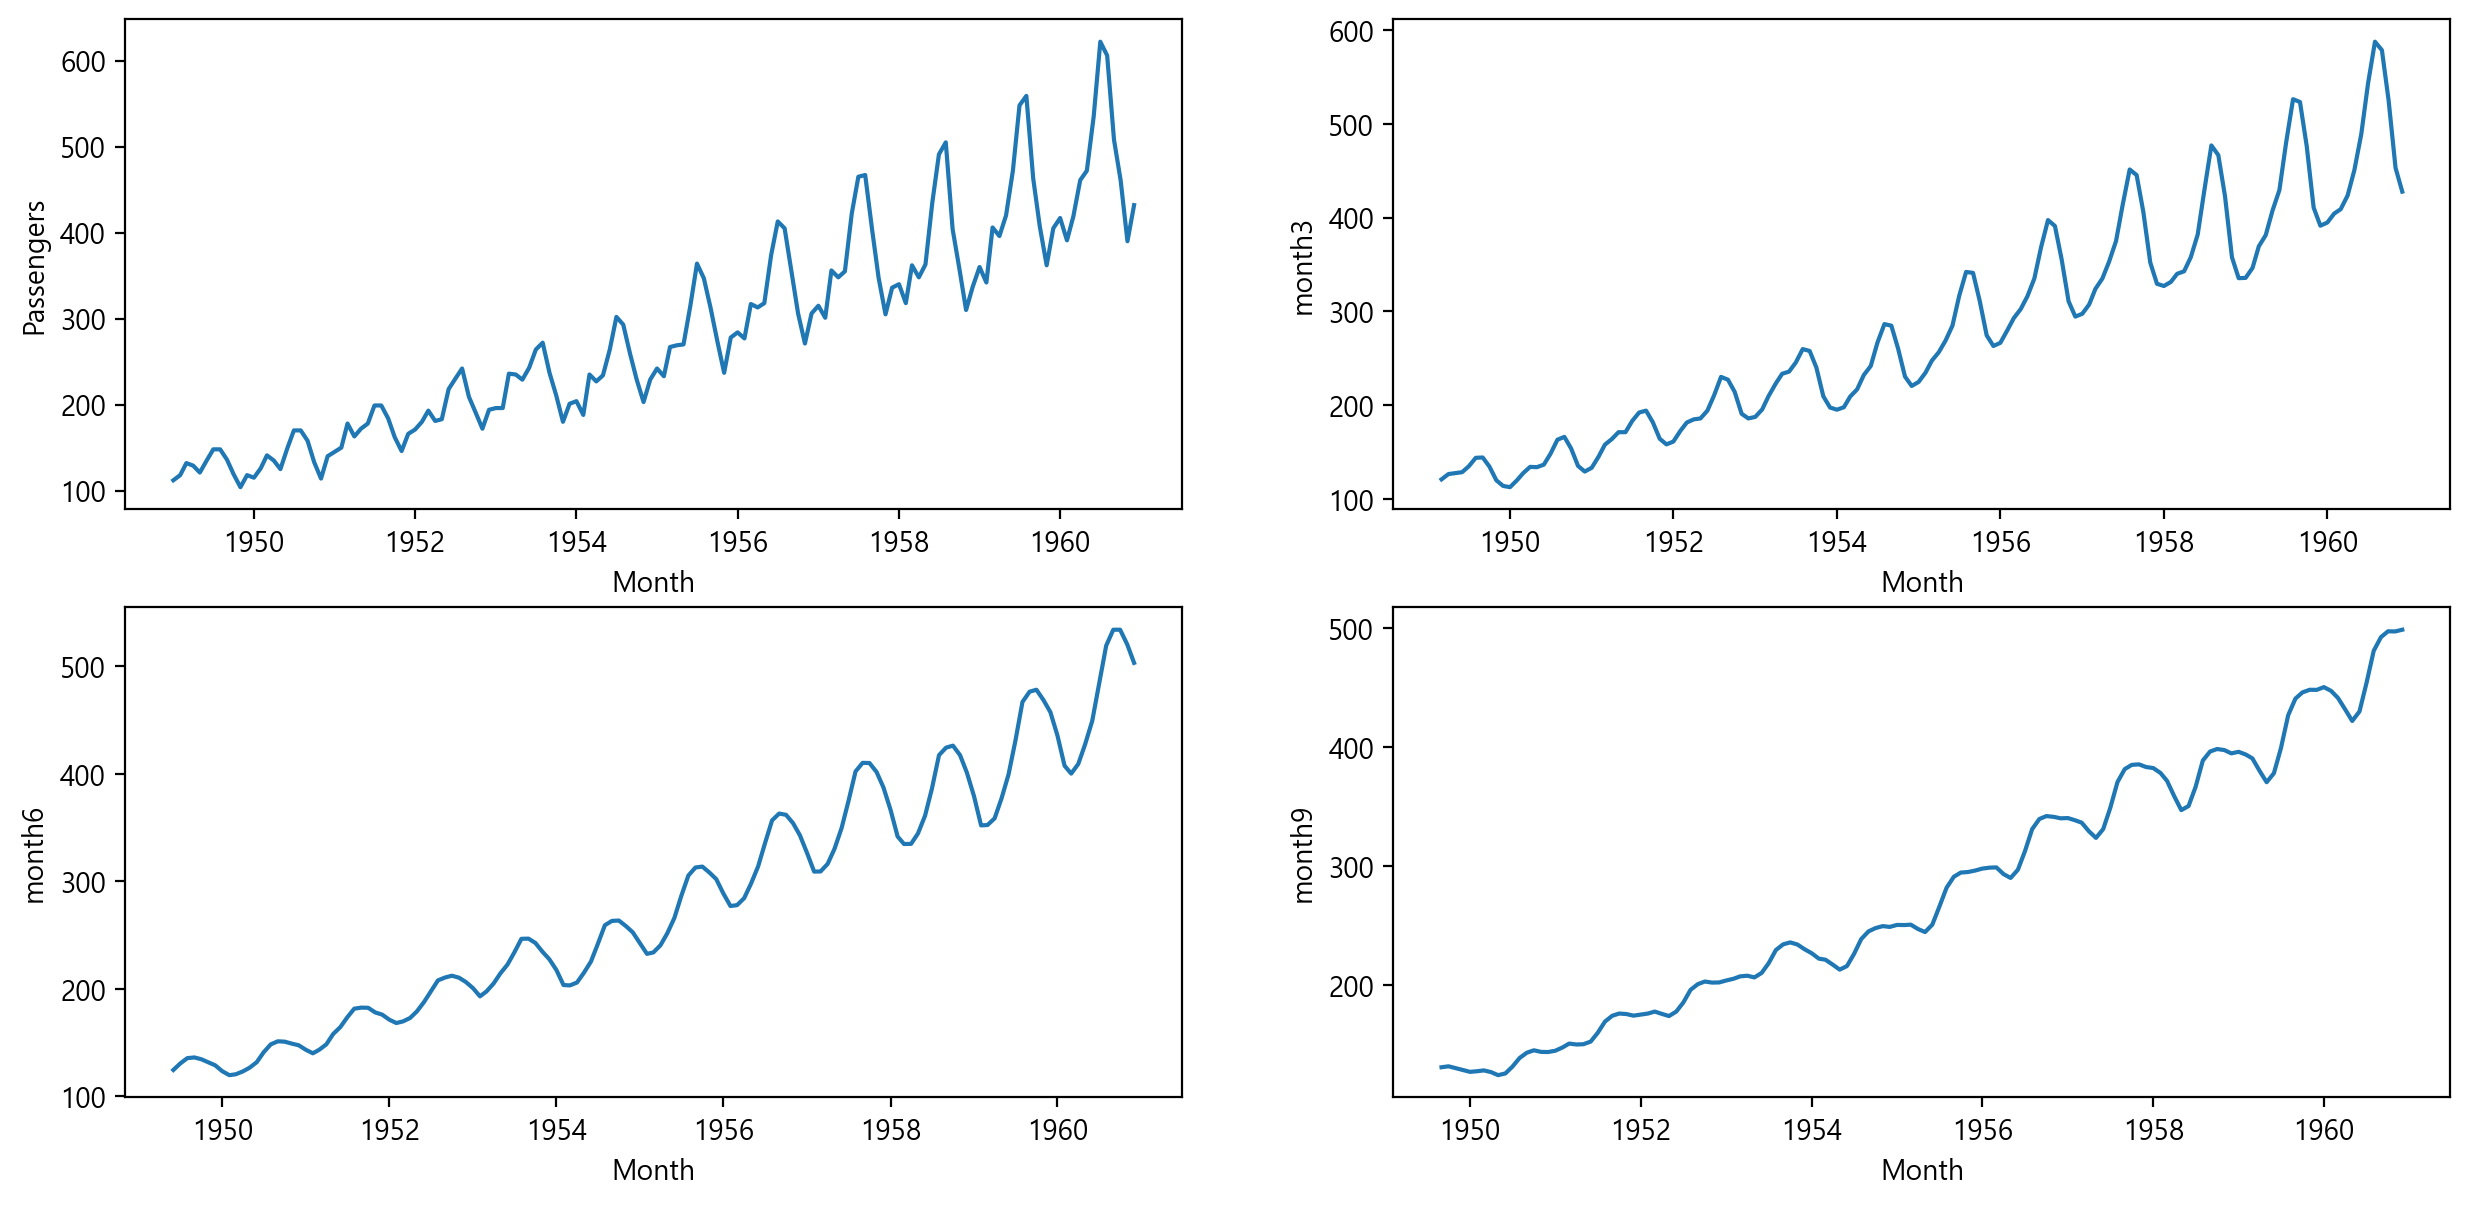

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 7))

sb.lineplot(data=df2, x=df2.index, y='Passengers', ax=ax1)
sb.lineplot(data=df2, x=df2.index, y='month3', ax=ax2)
sb.lineplot(data=df2, x=df2.index, y='month6', ax=ax3)
sb.lineplot(data=df2, x=df2.index, y='month9', ax=ax4)

plt.show()
plt.close()

> 데이터의 평균을 이동하여 점점 더 그래프가 단순해 진다. 이를 통해 월별 승객 수가 꾸준히 증가하는 추세라는 것을 알 수 있다.
>
> 원본 데이터로 확인할 경우 전반적인 경향을 알 수 있다.

### [2] 차분된 데이터 대한 3개월, 6개월, 9개월 평균

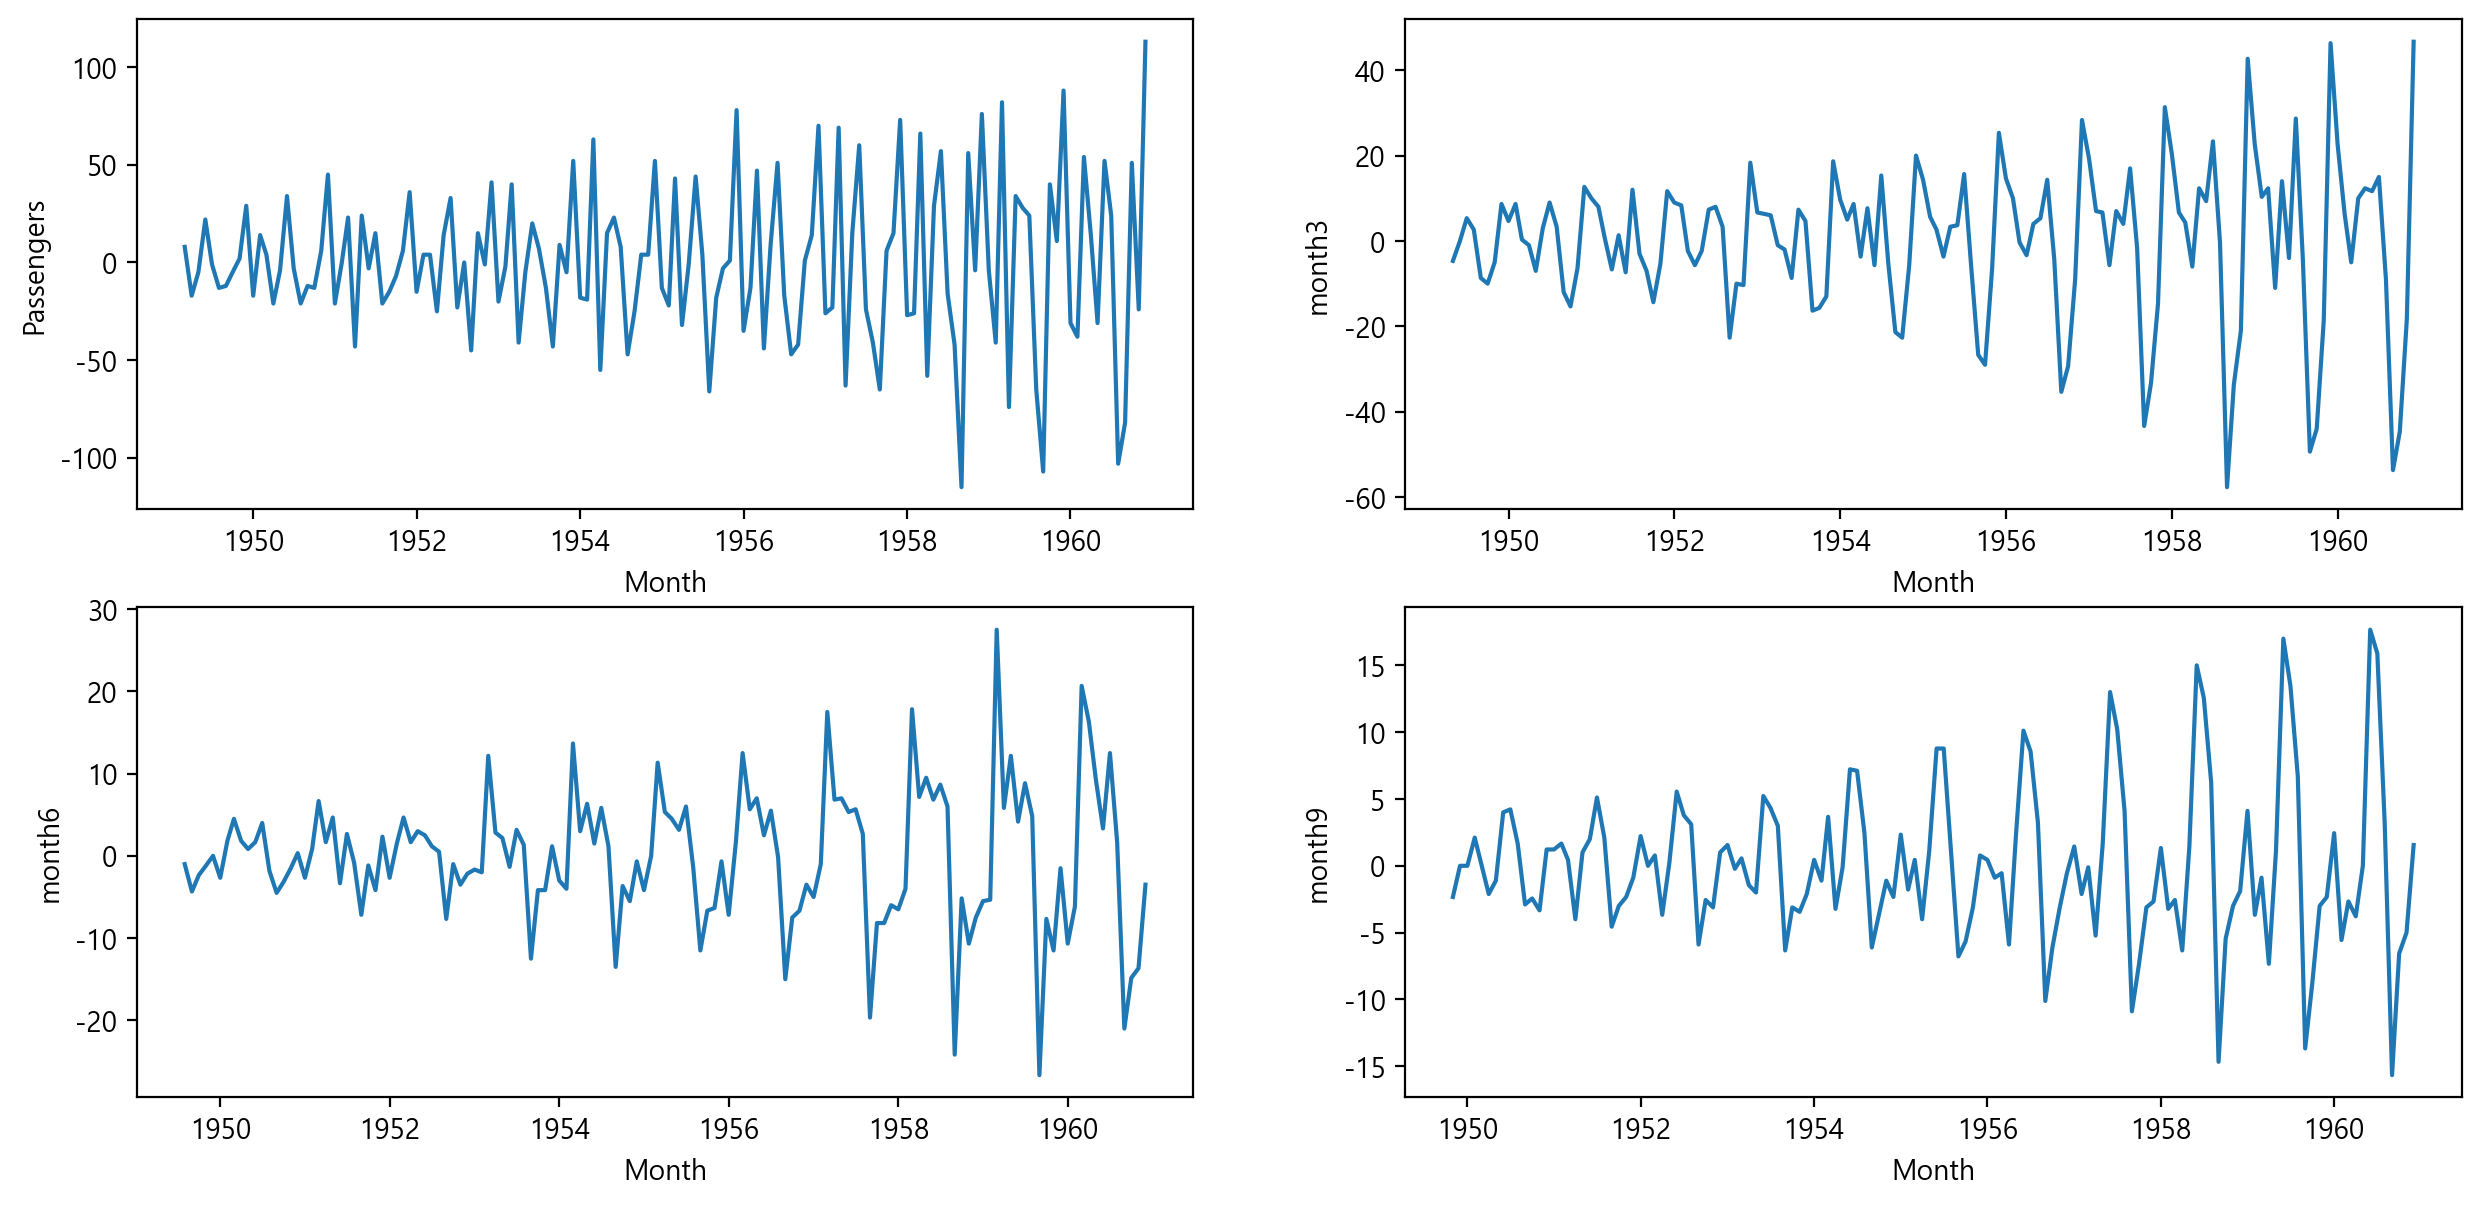

In [19]:
df['month3'] = df['Passengers'].rolling(3).mean()
df['month6'] = df['Passengers'].rolling(6).mean()
df['month9'] = df['Passengers'].rolling(9).mean()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 7))

sb.lineplot(data=df, x=df.index, y='Passengers', ax=ax1)
sb.lineplot(data=df, x=df.index, y='month3', ax=ax2)
sb.lineplot(data=df, x=df.index, y='month6', ax=ax3)
sb.lineplot(data=df, x=df.index, y='month9', ax=ax4)

plt.show()
plt.close()

> 평균이동을 할 수록 그래프가 단순해 져서 6개월 주기로 증감을 반복하는 트렌드가 있음을 알 수 있다.

## #04. 지수평활법

보다 최근의 값에 가중치를 두면서 이동평균을 계산하는 방법

### (1) 원본에 대한 지수평활법

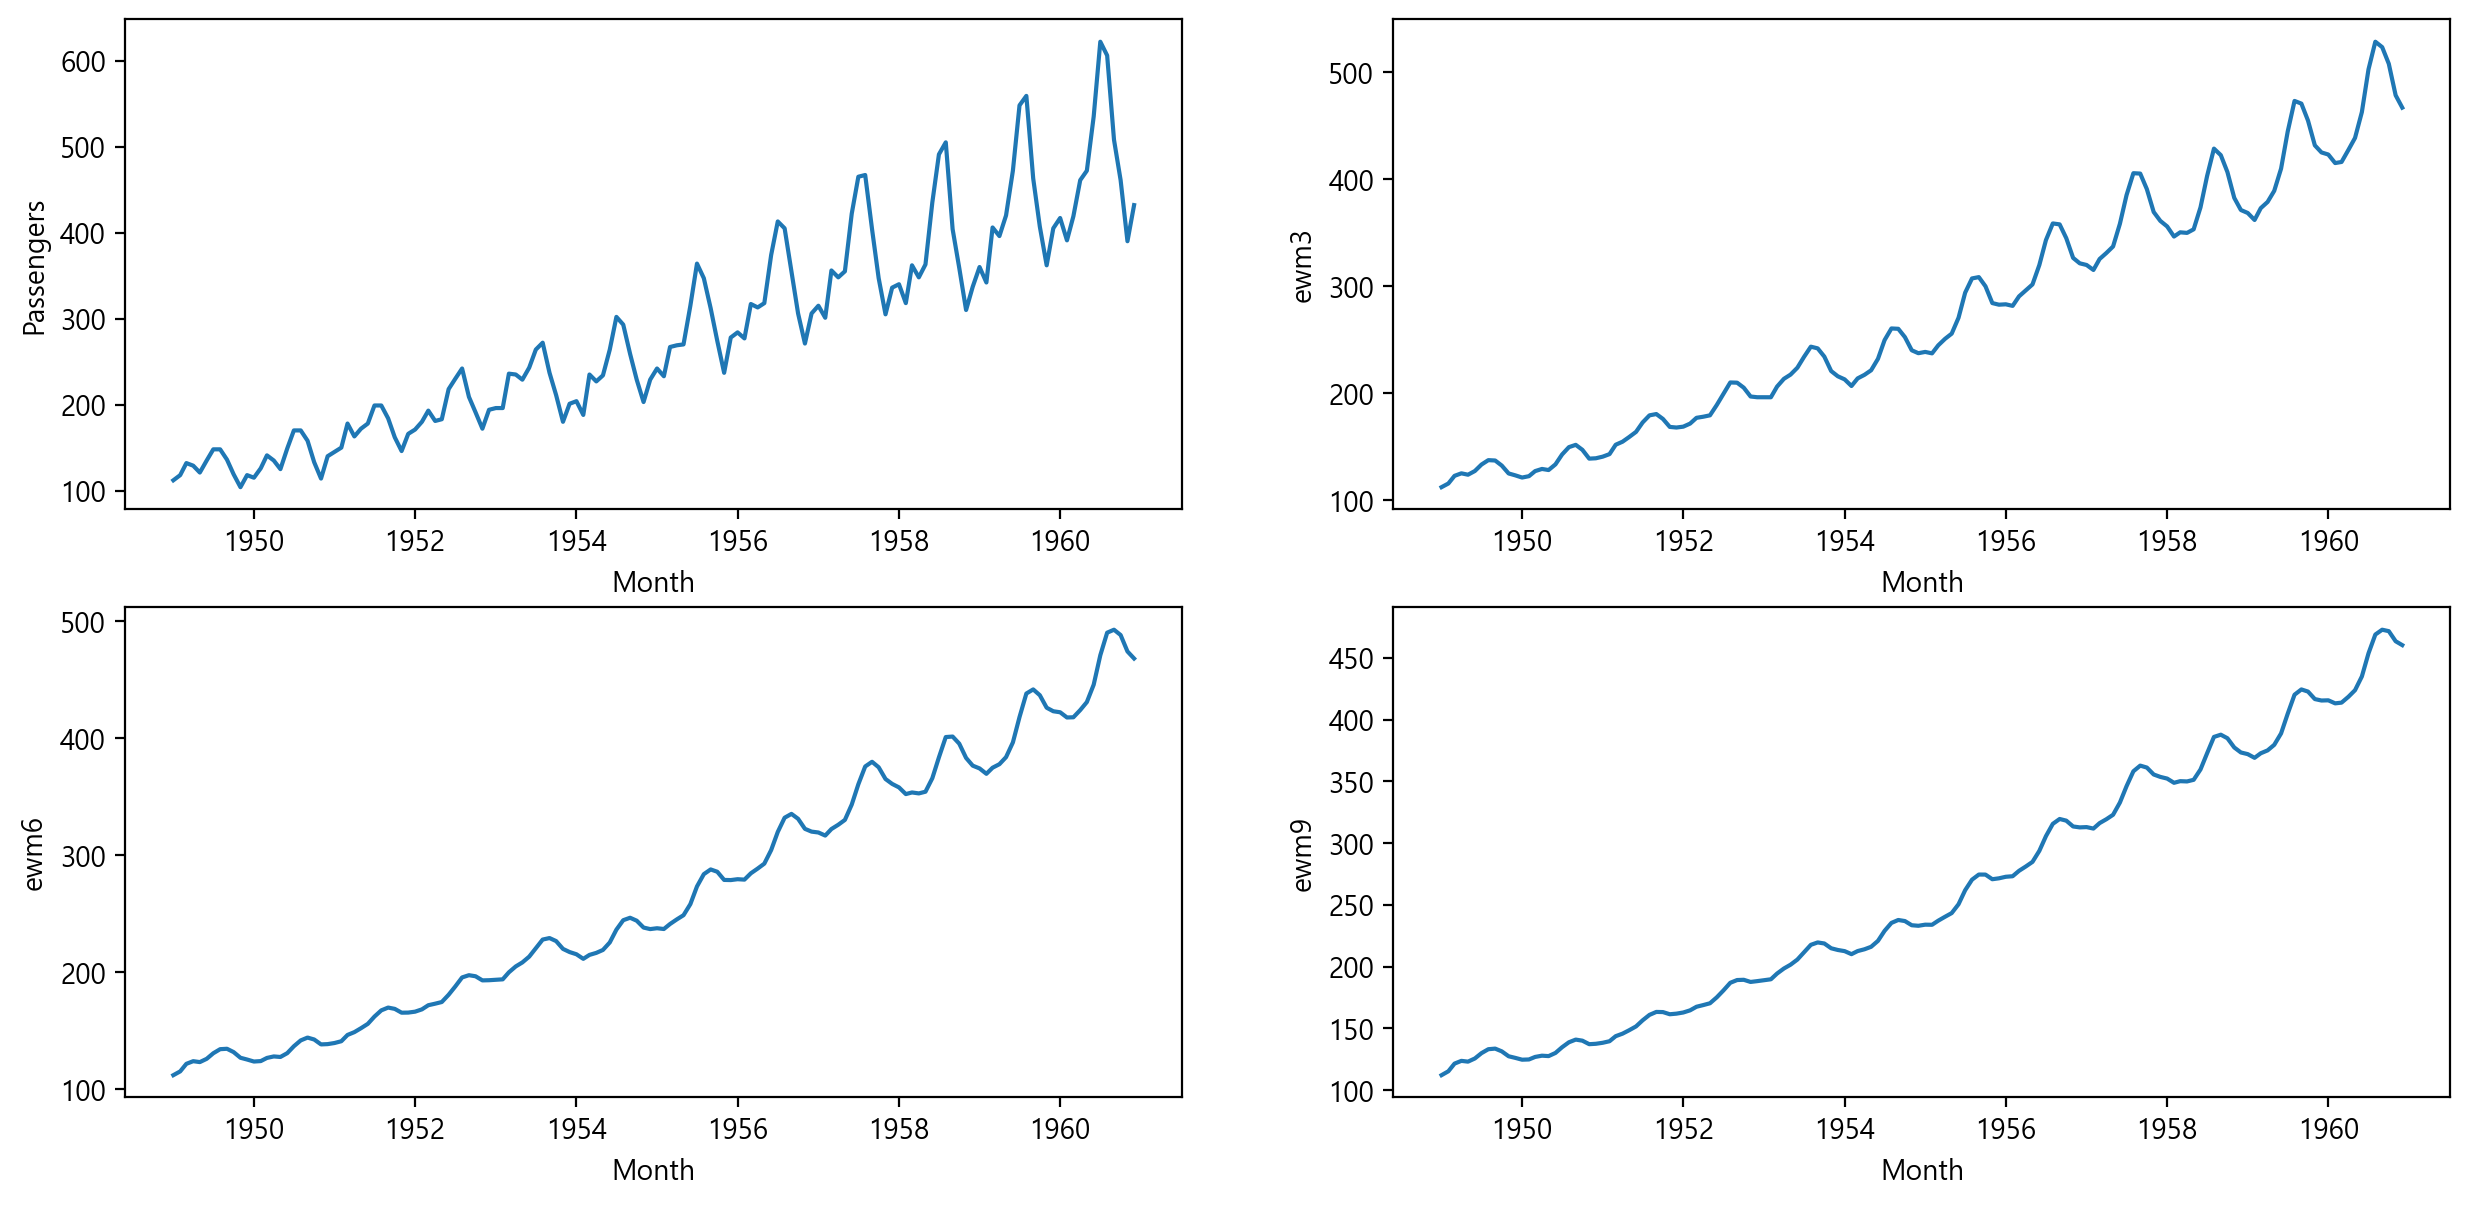

In [20]:
df2 = origin.copy()

df2['ewm3'] = df2['Passengers'].ewm(3).mean()
df2['ewm6'] = df2['Passengers'].ewm(6).mean()
df2['ewm9'] = df2['Passengers'].ewm(9).mean()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 7))

sb.lineplot(data=df2, x=df2.index, y='Passengers', ax=ax1)
sb.lineplot(data=df2, x=df2.index, y='ewm3', ax=ax2)
sb.lineplot(data=df2, x=df2.index, y='ewm6', ax=ax3)
sb.lineplot(data=df2, x=df2.index, y='ewm9', ax=ax4)

plt.show()
plt.close()

### (2) 차분 결과에 대한 지수평활법

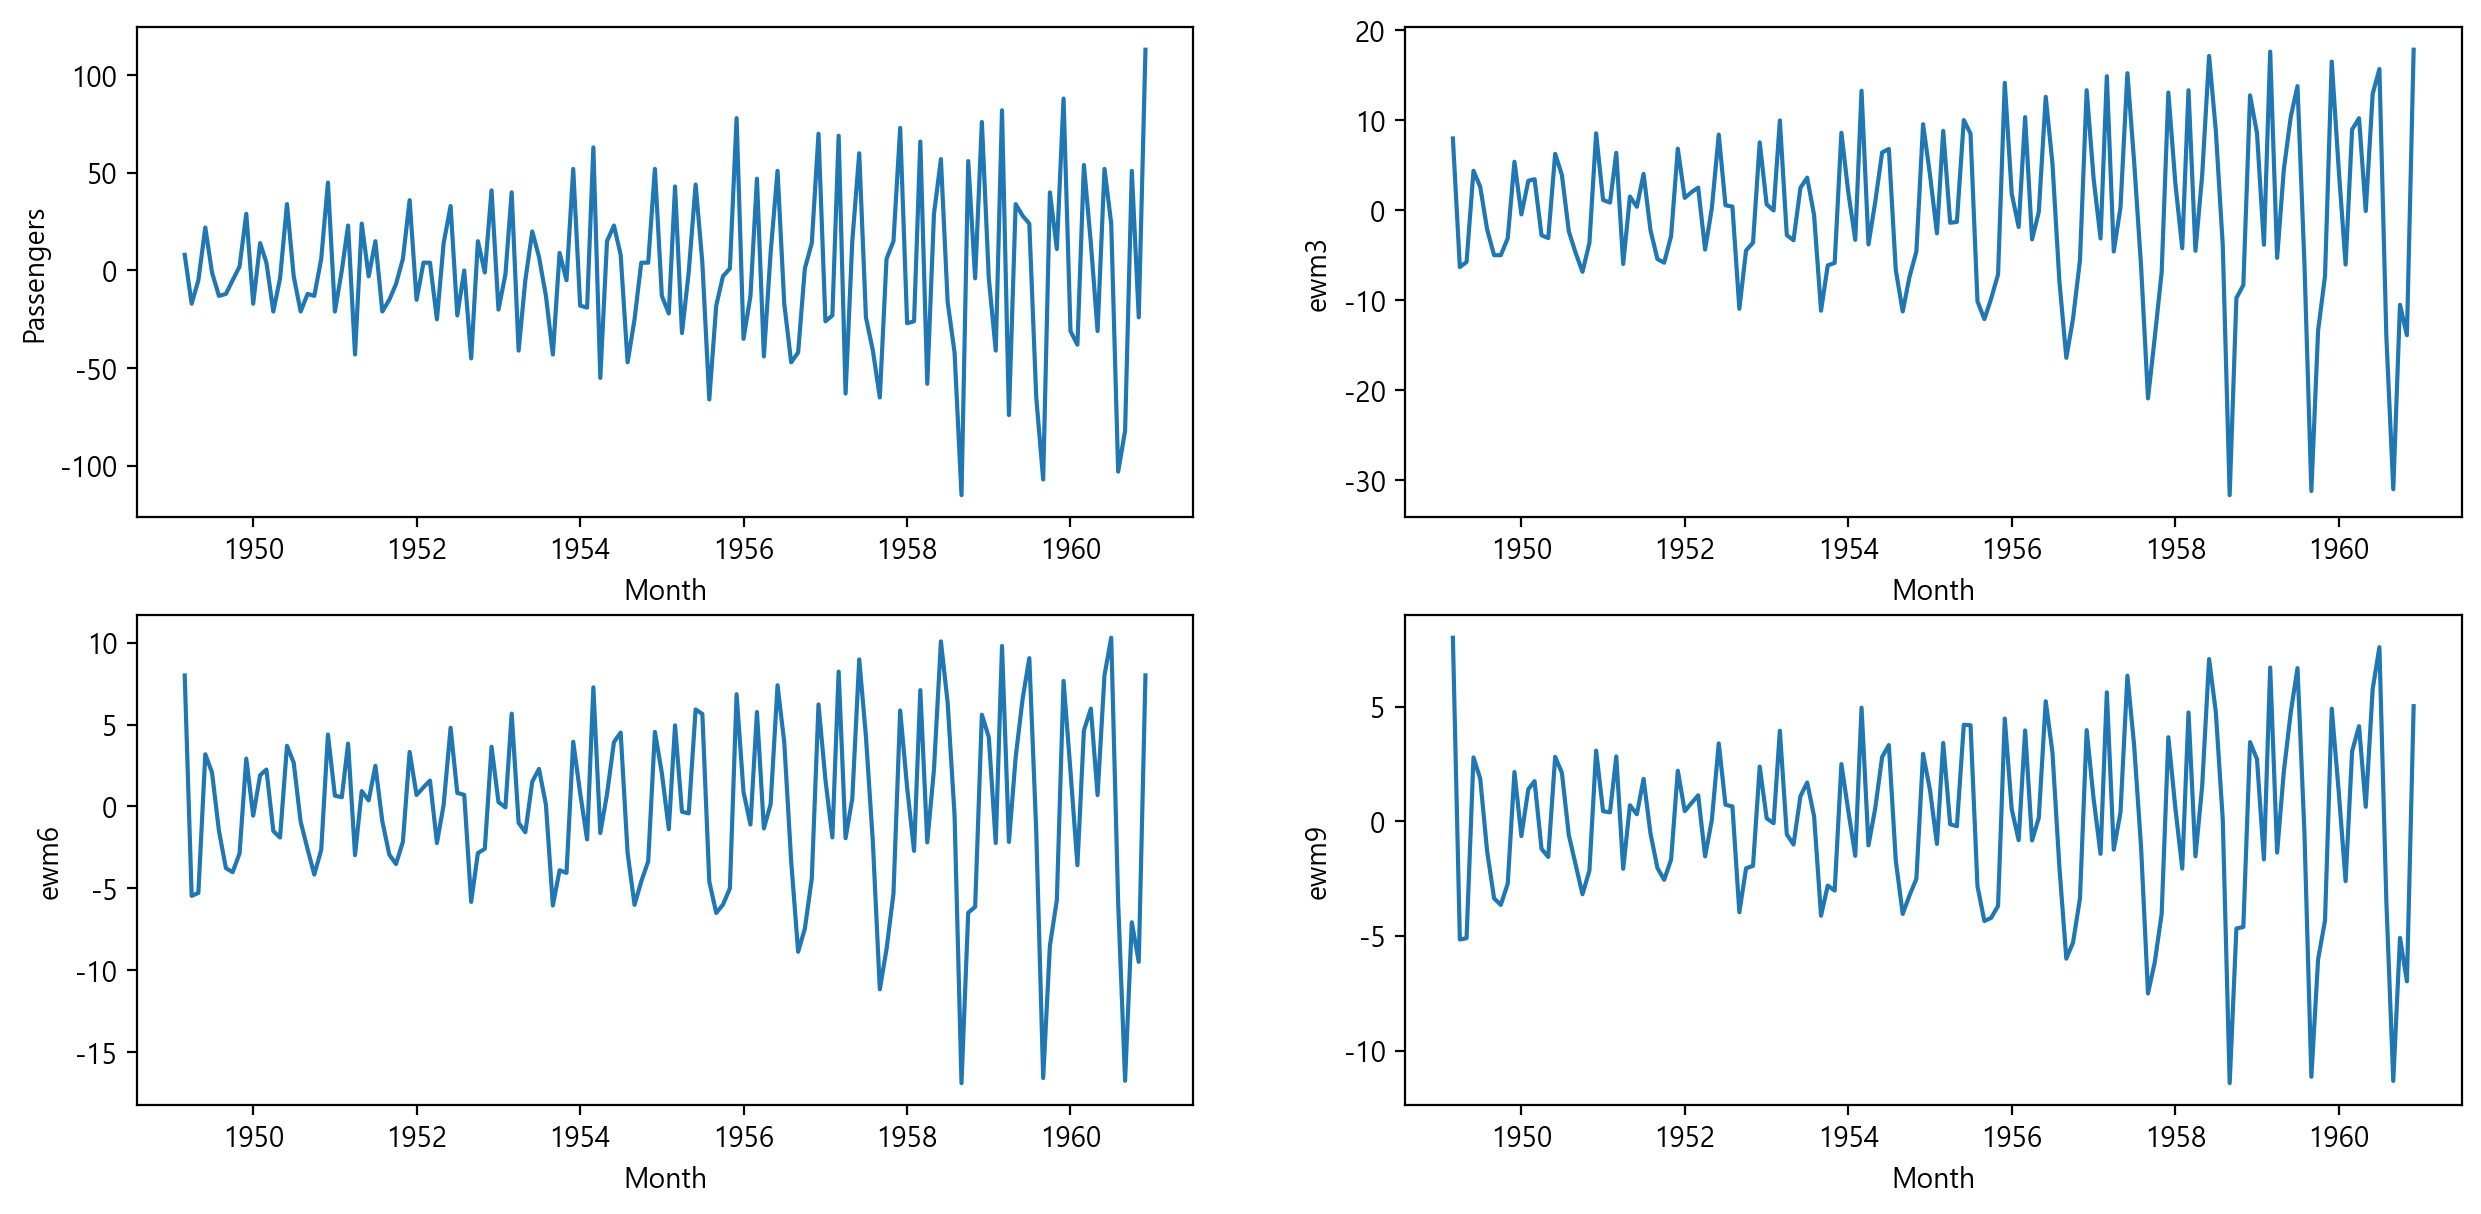

In [21]:
df['ewm3'] = df['Passengers'].ewm(3).mean()
df['ewm6'] = df['Passengers'].ewm(6).mean()
df['ewm9'] = df['Passengers'].ewm(9).mean()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 7))

sb.lineplot(data=df, x=df.index, y='Passengers', ax=ax1)
sb.lineplot(data=df, x=df.index, y='ewm3', ax=ax2)
sb.lineplot(data=df, x=df.index, y='ewm6', ax=ax3)
sb.lineplot(data=df, x=df.index, y='ewm9', ax=ax4)

plt.show()
plt.close()

> 평균이동법과 지수평활법은 시각화 결과물을 분석가의 주관대로 해석하는 방법이므로 추론통계보다는 탐색적 데이터 분석 과정에 더 가깝다.